#GROUP 9

Aditya Saputra - 10124034
Anike Pakpahan - 10124166
Aliya Nabilla - 11124446
Erika Clara Purwanti - 10124391
Jesica Khaira Syakbani - 10124612

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mengambil file .csv dari Google Drive kamu.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/imdb_top_250.csv')

In [4]:
df.head()

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     250 non-null    int64  
 1   Title    250 non-null    object 
 2   Year     250 non-null    int64  
 3   Rating   250 non-null    float64
 4   Runtime  250 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ KB


In [6]:
df.isnull().sum()

,0
Rank,0
Title,0
Year,0
Rating,0
Runtime,0


In [7]:
df.dtypes


,0
Rank,int64
Title,object
Year,int64
Rating,float64
Runtime,int64


In [9]:
df.describe()


,Rank,Year,Rating,Runtime
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,1985.57200,8.253200,129.108000
std,72.312977,24.50729,0.255874,31.573468
min,1.000000,1921.00000,8.000000,45.000000
25%,63.250000,1966.25000,8.025000,107.000000
50%,125.500000,1993.00000,8.200000,126.000000
75%,187.750000,2004.75000,8.400000,144.500000
max,250.000000,2020.00000,9.300000,312.000000


Periksa apakah ada duplikasi data


In [8]:
df.duplicated().sum()


np.int64(0)

Kesimpulannya: Setelah melakukan pengecekan data cleaning ternyata data yang saya ambil dari kaggle cukup bersih

## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

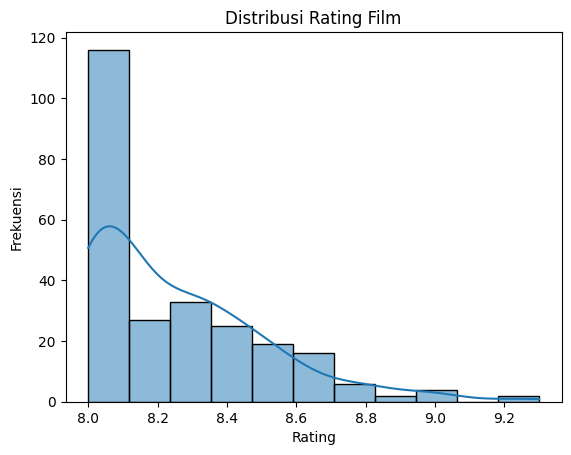

In [10]:
#Melihat gambaran rating yang tersebar
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Rating'], kde=True)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


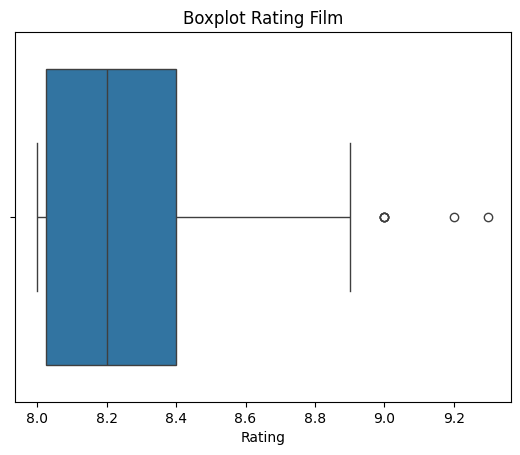

In [12]:
# Melihat film yang memiliki rating terendah & tertinggi
sns.boxplot(x=df['Rating'])
plt.title('Boxplot Rating Film')
plt.xlabel('Rating')
plt.show()


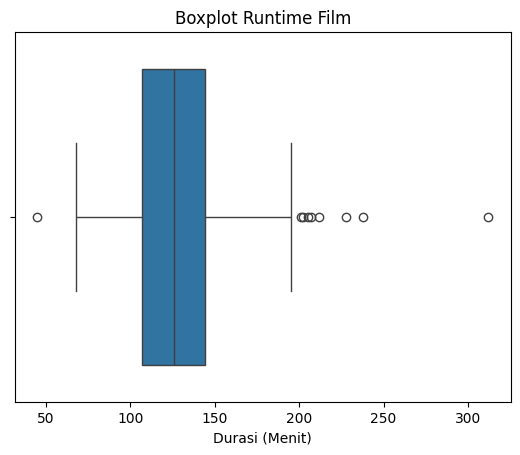

In [17]:
sns.boxplot(x=df['Runtime'])
plt.title('Boxplot Runtime Film')
plt.xlabel('Durasi (Menit)')
plt.show()

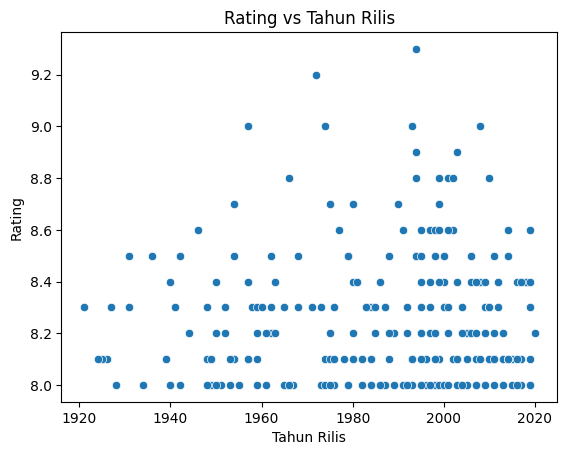

In [13]:
#Hubungan antara tahun rilis film dengan rating
sns.scatterplot(x=df['Year'], y=df['Rating'])
plt.title('Rating vs Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Rating')
plt.show()


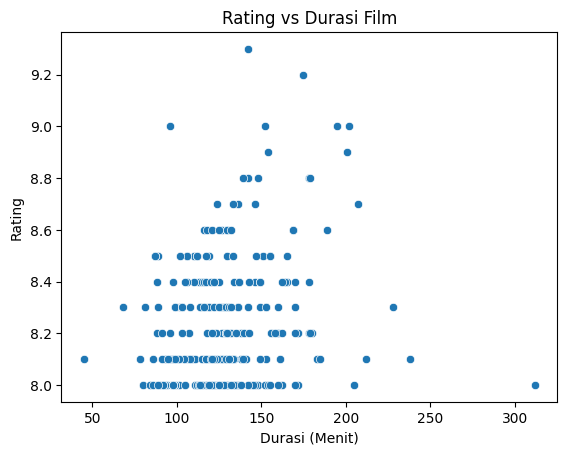

In [14]:
#Melihat apakah ada hubungan rating dengan durasi film
sns.scatterplot(x=df['Runtime'], y=df['Rating'])
plt.title('Rating vs Durasi Film')
plt.xlabel('Durasi (Menit)')
plt.ylabel('Rating')
plt.show()


Korelasi antara variabel numerik


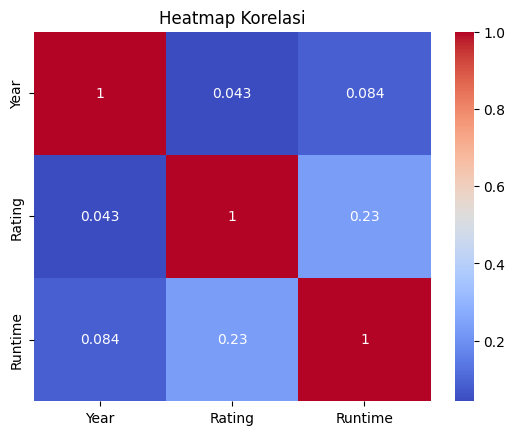

In [15]:
correlation = df[['Year', 'Rating', 'Runtime']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


## Data Preparation

Memisahkan data training dan testing

In [20]:
df_log = pd.read_csv('/content/drive/MyDrive/imdb_top_250.csv')


In [21]:
print(df_log.columns)

Index(['Rank', 'Title', 'Year', 'Rating', 'Runtime'], dtype='object')


In [24]:
# Memisahkan fitur dan target variabel
X = df_log[['Rank', 'Year', 'Runtime']]  # fitur
y = df_log['Rating']  # target variabel

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan testing
print(f'Ukuran data training: {X_train.shape}')
print(f'Ukuran data testing: {X_test.shape}')


Ukuran data training: (200, 3)
Ukuran data testing: (50, 3)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [27]:
# Inisialisasi model
lr_model = LinearRegression()

In [28]:
# Menggunakan model dengan training model
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Membuat prediksi model dengan test set
y_pred = lr_model.predict(X_test)

In [30]:
# Melihat intercept
lr_model.intercept_

np.float64(8.842656711389944)

In [31]:
# Melihat koefisien
coefficients = pd.DataFrame({
    'Feature': X_train.columns, # Changed X_train.column to X_train.columns
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
0,Rank,-0.003199
2,Runtime,0.000609
1,Year,-0.000135


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [32]:
# Mengkalkulasi metrics evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [33]:
# Mengeluarkan hasil
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9149
MAE: 0.0589
MSE: 0.0589
RMSE: 0.2428


In [34]:
#MAE
np.expm1(0.1676)

np.float64(0.18246353062586385)

R² sebesar 0.9149 menunjukkan bahwa model mampu menjelaskan sebagian besar variasi dalam data.

MAE dan RMSE yang kecil menunjukkan kesalahan prediksi yang rendah, yang berarti model memberikan prediksi yang akurat.

Evaluasi model ini dapat disimpulkan dengan baik, karena nilai R² yang tinggi dan metrik kesalahan yang rendah menunjukkan bahwa model yang digunakan dapat diandalkan untuk memprediksi rating film.